# Dataset distributions

In [84]:
from experiments.scaling_cubes import SceneCausalVariablesDataset
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from pathlib import Path
import torch

In [85]:
data_dir = Path("/mnt/raid/ni/jonasb/wscrl/data")

## causal_images: 3nodes

In [86]:
def plot_dim_hist(z, ax, title=None):
    ax.hist(z[:, 0], bins=100, alpha=0.5, density=True)
    ax.hist(z[:, 1], bins=100, alpha=0.5, density=True)
    ax.hist(z[:, 2], bins=100, alpha=0.5, density=True)

    ax.legend(["$z_1$", "$z_2$", "$z_3$"])
    ax.set_xlabel("z")
    ax.set_ylabel("density")
    if title is not None:
        ax.set_title(title)

In [90]:
dataset = SceneCausalVariablesDataset(
    base_dir=data_dir / "3node_64_png/",
    tag="train",
    noise=None,
)

batchsize = len(dataset)
dataloader = DataLoader(dataset, batch_size=batchsize, shuffle=False)

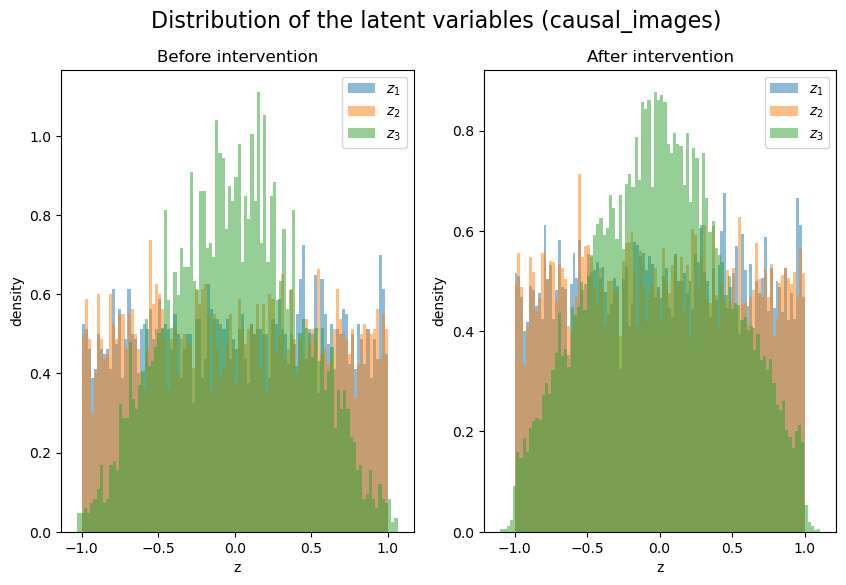

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

fig.suptitle("Distribution of the latent variables (causal_images)", fontsize=16)
for x1, x2, z1, z2, intervention_label, e1, e2 in dataloader:
    plot_dim_hist(z1, axes[0], "Before intervention")
    plot_dim_hist(z2, axes[1], "After intervention")

In [110]:
from ws_crl.encoder import SONEncoder
from ws_crl.encoder.base import Inverse

encoder = SONEncoder(input_features=3, output_features=3, coeff_std=1.0)
decoder = Inverse(encoder)

In [114]:
z = [1., 2., 3.]
x = list(decoder(torch.tensor(z).unsqueeze(0))[0].detach().numpy())
x

[array([2.4405198, 2.2683535, 1.7024794], dtype=float32)]

In [122]:
def __getitem__(index):
    partition_length = 4000
    _index = index % partition_length
    intervention_index = int(index / partition_length)
    return _index, intervention_index

__getitem__(200)

(200, 0)

## FlowLCM

In [126]:
filename = Path(data_dir) / "scaling" / "dim_3_mode_random_seed_1000_trainsize_100000" / "train.pt"
data = torch.load(filename)
dataset = TensorDataset(*data)
batchsize = len(dataset)
dataloader = DataLoader(dataset, batch_size=batchsize, shuffle=True)

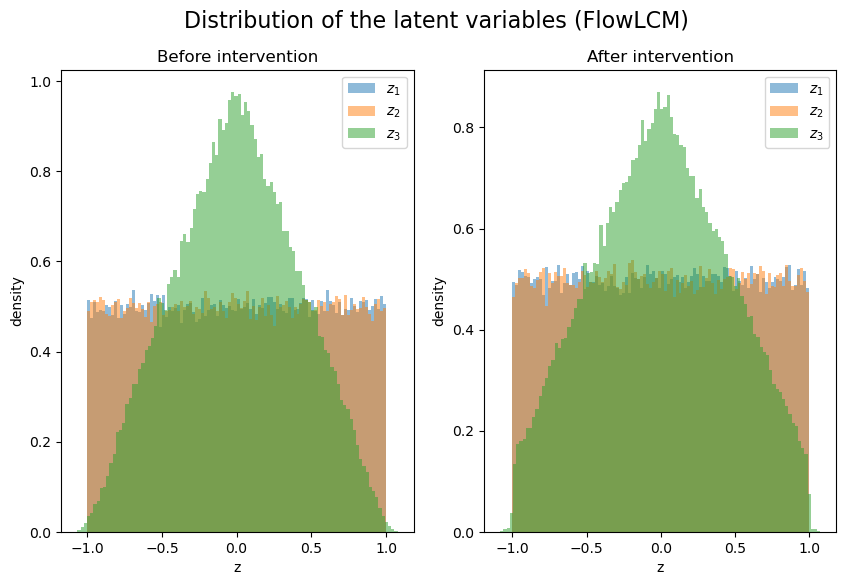

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

fig.suptitle("Distribution of the latent variables (FlowLCM)", fontsize=16)

for x1, x2, z1, z2, intervention_labels, true_interventions in dataloader:
    plot_dim_hist(z1, axes[0], "Before intervention")
    plot_dim_hist(z2, axes[1], "After intervention")

In [128]:
z1[:10], z2[:10], intervention_labels[:10]

(tensor([[ 0.9188,  0.0772,  0.5132],
         [-0.1070, -0.6318, -0.4584],
         [ 0.1183, -0.1773, -0.0025],
         [-0.3827, -0.0336, -0.2084],
         [ 0.7511, -0.8056,  0.0220],
         [-0.4056, -0.0263, -0.3087],
         [-0.6547, -0.6507, -0.6694],
         [ 0.6065,  0.3179,  0.4989],
         [-0.8176,  0.1477, -0.3683],
         [-0.9906,  0.0034, -0.4911]]),
 tensor([[ 0.9198,  0.0764, -0.9918],
         [-0.1074, -0.6324,  0.9542],
         [ 0.1189, -0.1772, -0.0022],
         [-0.3818,  0.8545,  0.2369],
         [ 0.7512, -0.8059,  0.0227],
         [-0.5922, -0.0260, -0.4011],
         [-0.6555, -0.6503, -0.6693],
         [ 0.6066,  0.3189, -0.2734],
         [-0.8179,  0.1469,  0.1769],
         [-0.9903,  0.0026,  0.2996]]),
 tensor([3, 3, 0, 2, 0, 1, 0, 3, 3, 3]))